In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm
from scipy.special import gamma, loggamma, factorial
import scipy.stats
from scipy.interpolate import interp1d
from matplotlib.ticker import AutoMinorLocator 
from matplotlib import rc, font_manager
from matplotlib.lines import Line2D
from matplotlib import colors as mcolors
from mycolorpy import colorlist as mcp
from matplotlib import legend_handler
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import collections
import matplotlib
import shapely.geometry
from shapely.geometry import Point
import shapely.ops 
from geopy.geocoders import Nominatim
import geopandas as gpd
import mapclassify
import jenkspy
import contextily as cx
import os
import rioxarray as rx
import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from pysal.lib import weights
from libpysal.io import open as psopen
# import plots
import seaborn as sns
from datetime import datetime, timedelta
import jenkspy

In [2]:
wd = '/Users/carmen/Library/CloudStorage/OneDrive-TheUniversityofLiverpool/Research/RECAST/latin-mobility-covid-local-files'


country = 'Argentina'

if country=='Argentina':
    country_short = 'ARG'
    country_code = 'AR'
elif country == 'Chile':
    country_short = 'CHL'
    country_code = 'CL'
elif country == 'Colombia':
    country_short = 'COL'
    country_code = 'CO'
elif country == 'Mexico':
    country_short = 'MEX'
    country_code = 'MX'

In [4]:
raw = False

if raw == True:
    baseline_mov = pd.read_csv(wd + '/data/outputs/' + country_short + '/baseline/baseline_mov.csv')#.drop('Unnamed: 0', axis=1)
else:
    baseline_mov_imput = pd.read_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-imput-mov-dist-with-exo-var-flatten.csv').drop('Unnamed: 0', axis=1)

baseline_pop_imput = gpd.read_file(wd + '/data/outputs/' + country_short + '/grids-with-data/movcell-baseline-imput-pop-with-exo-var/movcell-baseline-imput-pop-with-exo-var.gpkg')


In [5]:
baseline_mov_imput

,O,D,0,1,2,3,4,5,6
0,5483.0,5482.0,2.811058,2.773371,2.816979,2.815784,2.785251,2.733692,2.691715
1,5726.0,5645.0,2.289276,2.295847,2.332406,2.326201,2.301827,2.242127,2.204866
2,5482.0,5565.0,76.000000,69.600000,57.000000,59.400000,58.200000,53.000000,69.400000
3,10944.0,10875.0,3.032666,2.993461,3.042546,3.038616,3.005203,2.959951,2.916962
4,5565.0,5482.0,75.800000,76.800000,86.200000,83.000000,83.200000,60.500000,50.600000
...,...,...,...,...,...,...,...,...,...
63665,7860.0,7791.0,1.059409,1.073843,1.072545,1.062841,1.050172,1.036032,1.463190
63666,6023.0,6579.0,1.445158,1.466381,1.464412,1.451496,1.425948,1.412838,1.642761
63667,6334.0,5410.0,1.625065,1.650665,1.648771,1.631864,1.600196,1.568767,2.143377
63668,7430.0,7775.0,2.120809,2.150826,2.155068,2.132359,2.094231,2.067078,1.439862


### Evolution by day distance > 0

In [6]:
directory = wd + '/data/outputs/' + country_short + '/mov'
files = sorted(os.listdir(directory))
files = [file for file in files if not file.startswith('.')]

start_date = datetime.strptime(files[0][-19:-9], '%Y-%m-%d')
end_date = datetime.strptime(files[-1][-19:-9], '%Y-%m-%d')
delta = end_date - start_date
columns = [str(start_date + timedelta(days=i))[0:10] for i in range(delta.days + 1)] 

if raw == True:
    df_mov_evo_dist = pd.DataFrame({column: [np.nan for i in range(len(baseline_mov))] for column in columns})
    df_mov_evo_dist.insert(loc=df_mov_evo_dist.columns.get_loc(df_mov_evo_dist.columns[0]), column='D', value=baseline_mov['D'])
    df_mov_evo_dist.insert(loc=df_mov_evo_dist.columns.get_loc(df_mov_evo_dist.columns[0]), column='O', value=baseline_mov['O'])
    df_mov_evo_dist_baseline_from_mov = df_mov_evo_dist.copy() 
else:
    df_mov_evo_dist = pd.DataFrame({column: [np.nan for i in range(len(baseline_mov_imput))] for column in columns})
    df_mov_evo_dist.insert(loc=df_mov_evo_dist.columns.get_loc(df_mov_evo_dist.columns[0]), column='D', value=baseline_mov_imput['D'])
    df_mov_evo_dist.insert(loc=df_mov_evo_dist.columns.get_loc(df_mov_evo_dist.columns[0]), column='O', value=baseline_mov_imput['O'])
    df_mov_evo_dist_baseline_from_baseline = df_mov_evo_dist.copy()

In [7]:
for i in range(1):
    
    if i%50 == 0:
        print(i/len(files)*100)
        
    file = files[i]

    df_movs = pd.read_csv(directory + '/' + file).drop('Unnamed: 0', axis=1)

0.0


In [12]:
if country=='Argentina':
    area_names = ["José C. Paz", "San Miguel", "Morón", "Capital Federal", "Esteban Echeverría", "Florencio Varela"]
elif country == 'Chile':
    area_names = ?
elif country == 'Colombia':
    area_names = ?
df_movs[df_movs[start_polygon_name''].isin(area_names)]



,geometry,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,...,end_lat,end_lon,start_quadkey,end_quadkey,start_lstr_lat,start_lstr_lon,end_lstr_lat,end_lstr_lon,start_FID,end_FID
342,LINESTRING (-58.44726562499999 -34.66932700748...,2020-04-02 08:00,6924,Capital Federal,6536,Tigre,36.008744,11,AR,LEVEL4,...,-34.382851,-58.605809,21032130031,21032130010,-34.669327,-58.447266,-34.379681,-58.623047,6580.0,6717.0
357,LINESTRING (-58.44726562499999 -34.66932700748...,2020-04-02 08:00,6924,Capital Federal,6468,General Rodríguez,48.226725,11,AR,LEVEL4,...,-34.654165,-58.991606,21032130031,21032130020,-34.669327,-58.447266,-34.669327,-58.974609,6580.0,6577.0
406,LINESTRING (-58.44726562499999 -34.66932700748...,2020-04-02 08:00,6924,Capital Federal,6530,San Nicolás,217.960678,11,AR,LEVEL4,...,-33.479408,-60.292389,21032130031,21032103021,-34.669327,-58.447266,-33.358031,-60.205078,6580.0,7174.0
483,LINESTRING (-58.62304687499999 -34.52462999448...,2020-04-02 08:00,6529,San Miguel,6536,Tigre,16.117600,11,AR,LEVEL4,...,-34.382851,-58.605809,21032130012,21032130010,-34.524630,-58.623047,-34.379681,-58.623047,6649.0,6717.0
486,"LINESTRING (-58.623046875 -34.66932700748795, ...",2020-04-02 08:00,6500,Morón,6536,Tigre,32.207199,11,AR,LEVEL4,...,-34.382851,-58.605809,21032130030,21032130010,-34.669327,-58.623047,-34.379681,-58.623047,6579.0,6717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,LINESTRING (-58.44726562499999 -34.66932700748...,2020-04-02 08:00,6924,Capital Federal,6450,Escobar,45.547853,11,AR,LEVEL4,...,-34.330590,-58.772201,21032130031,21032130001,-34.669327,-58.447266,-34.379681,-58.798828,6580.0,6716.0
7005,LINESTRING (-58.79882812499999 -34.52462999448...,2020-04-02 08:00,6476,José C. Paz,6450,Escobar,16.117600,11,AR,LEVEL4,...,-34.330590,-58.772201,21032130003,21032130001,-34.524630,-58.798828,-34.379681,-58.798828,6648.0,6716.0
7020,"LINESTRING (-58.623046875 -34.66932700748795, ...",2020-04-02 08:00,6500,Morón,6450,Escobar,36.008744,11,AR,LEVEL4,...,-34.330590,-58.772201,21032130030,21032130001,-34.669327,-58.623047,-34.379681,-58.798828,6579.0,6716.0
7051,"LINESTRING (-58.271484375 -34.81377171979245, ...",2020-04-02 08:00,6454,Florencio Varela,6495,Mercedes,113.571649,11,AR,LEVEL4,...,-34.700910,-59.427784,21032130122,21032121121,-34.813772,-58.271484,-34.669327,-59.501953,6509.0,6574.0


In [6]:
# #Only uncomment if I wanted to rerun the code - TAKES A LONG TIME!

for i in range(len(files)):
    
    if i%50 == 0:
        print(i/len(files)*100)
        
    file = files[i]

    df_movs = pd.read_csv(directory + '/' + file).drop('Unnamed: 0', axis=1)

    date = file[-19:-9]
    wday = datetime.strptime(file[-19:-9], "%Y-%m-%d").weekday()

    for j in range(len(df_movs)):
                
        if df_movs.loc[j, 'length_km'] > 0:
            start_FID = df_movs.loc[j, 'start_FID']
            end_FID = df_movs.loc[j, 'end_FID']
            start_poly_name = df_movs.loc[j, 'start_polygon_name']
            end_poly_name = df_movs.loc[j, 'end_polygon_name']
            try:
                df_mov_evo_dist_filter_O = df_mov_evo_dist[df_mov_evo_dist['O'] == start_poly_name].copy() 
                df_mov_evo_dist_filter_OD = df_mov_evo_dist_filter_O[df_mov_evo_dist_filter_O['D'] == end_poly_name]
                index = df_mov_evo_dist_filter_OD.index[0]

                n_crisis = df_movs.loc[j, 'n_crisis']
                n_baseline = baseline_mov_imput.loc[index, str(wday)]

                if pd.isna(n_crisis) == False and pd.isna(n_baseline) == False:
                    if raw == True:
                        df_mov_evo_dist.loc[index, str(date)] = n_crisis
                        df_mov_evo_dist_baseline_from_mov.loc[index, str(date)] = n_baseline
                    else:
                        df_mov_evo_dist.loc[index, str(date)] = n_crisis
                else:
                    if raw == False:
                        per_change = df_movs.loc[j, 'percent_change']
                        df_mov_evo_dist.loc[index, str(date)] = n_baseline*per_change/100 + n_baseline
                if raw == False:
                    df_mov_evo_dist_baseline_from_baseline.loc[index, str(date)] = n_baseline
            except:
                print('OD pair not found')                
                

if raw == True:
    df_mov_evo_dist.to_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_dist_raw.csv')
    df_mov_evo_dist_baseline_from_mov.to_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_baseline_dist_raw.csv')
else:
    df_mov_evo_dist.to_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_dist_sample.csv')
    df_mov_evo_dist_baseline_from_baseline.to_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_baseline_dist_sample.csv')


0.0
6.561679790026247
13.123359580052494
19.68503937007874
26.246719160104988
32.808398950131235
39.37007874015748
45.93175853018373
52.493438320209975
59.055118110236215
65.61679790026247
72.17847769028872
78.74015748031496
85.30183727034121
91.86351706036746
98.4251968503937


### Example of evolution of movements and movements/FBuser

In [14]:
df_pop_evo = pd.read_csv(wd + '/data/outputs/' + country_short + '/evo/pop_evo_movcell.csv').drop('Unnamed: 0', axis=1)

if raw == True:
    df_mov_evo = pd.read_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_dist_raw.csv').drop('Unnamed: 0', axis=1)
    df_mov_evo_baseline = pd.read_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_baseline_dist_raw.csv').drop('Unnamed: 0', axis=1)
else:
    df_mov_evo = pd.read_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_dist.csv').drop('Unnamed: 0', axis=1)
    df_mov_evo_baseline = pd.read_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_baseline_dist.csv').drop('Unnamed: 0', axis=1)


In [15]:
df_mov_evo

,O,D,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21
0,5483.0,5482.0,2.815784,NaN,NaN,NaN,NaN,4.622284,3.250361,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5726.0,5645.0,0.861556,2.301827,1.888107,6.430858,3.81546,4.464147,1.943672,3.015446,...,2.584668,1.150914,1.888107,NaN,NaN,3.188676,NaN,2.15389,2.301827,1.888107
2,5482.0,5565.0,38.000000,42.000000,42.000000,27.000000,35.00000,43.000000,40.000000,45.000000,...,47.000000,46.000000,43.000000,33.000000,44.0,47.000000,30.000000,39.00000,38.000000,34.000000
3,10944.0,10875.0,5.064360,NaN,3.946602,NaN,NaN,11.641238,NaN,6.330451,...,2.532180,6.260840,NaN,3.889283,NaN,3.326068,6.338638,NaN,2.504336,NaN
4,5565.0,5482.0,45.000000,60.000000,41.000000,19.000000,59.00000,57.000000,64.000000,51.000000,...,80.000000,78.000000,52.000000,33.000000,71.0,73.000000,27.000000,91.00000,80.000000,52.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63665,7860.0,7791.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.144130
63666,6023.0,6579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.844016
63667,6334.0,5410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.843833
63668,7430.0,7775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.268312


In [9]:
column_to_drop = []
for column in df_pop_evo.columns[1:]:
    if column not in df_mov_evo.columns[2:]:
        column_to_drop.append(column)
df_pop_evo = df_pop_evo.drop(column_to_drop, axis=1)


column_to_drop = []     
for column in df_mov_evo.columns[2:]:
    if column not in df_pop_evo.columns[1:]:
        column_to_drop.append(column)
df_mov_evo = df_mov_evo.drop(column_to_drop, axis=1)


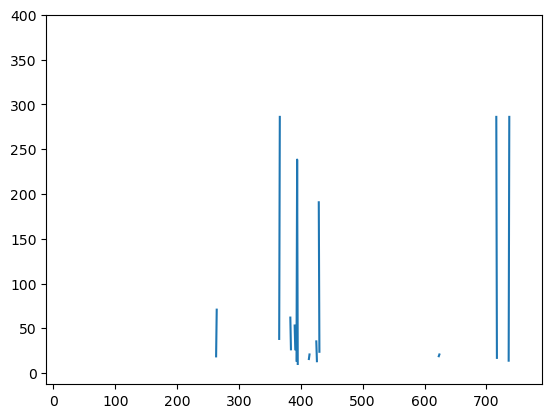

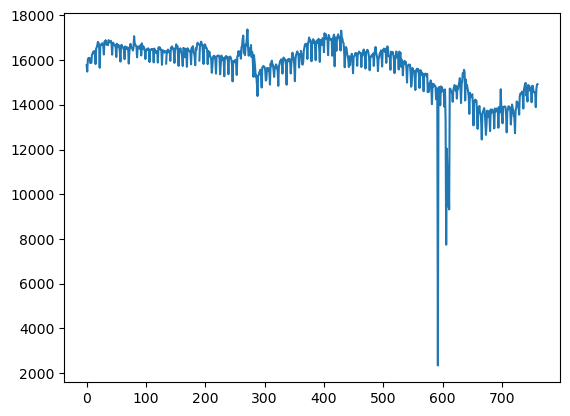

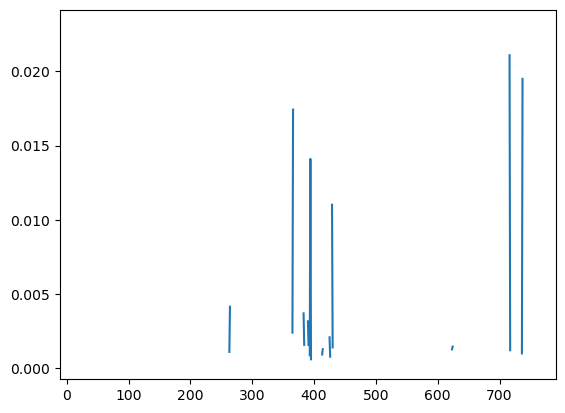

In [10]:
row = 1750
origin = df_mov_evo.loc[row,'O']

evo_movs = df_mov_evo.loc[row, df_mov_evo.columns[2:]]
plt.plot(np.arange(len(evo_movs)), evo_movs)

plt.show()


evo_pops = df_pop_evo[df_pop_evo['FID']==origin].reset_index(drop=True)
evo_pops = evo_pops.loc[0, evo_pops.columns[1:]]
plt.plot(np.arange(len(evo_pops)), evo_pops)

plt.show()

evo_movs_per_pop = []

for i in range(len(evo_pops)):
    if pd.isna(evo_pops[i]) == False:
        evo_movs_per_pop.append(evo_movs[i]/evo_pops[i])
    else:
        evo_movs_per_pop.append(np.nan)

fig,ax= plt.subplots()

ax.plot(np.arange(len(evo_movs_per_pop)), evo_movs_per_pop)
# ax.set_xlim([-5,100])

plt.show()

### Adjust FB movs evo according to quotient of median (baseline) and daily FB pop in tile

In [11]:
[np.sum(df_pop_evo[column]) for column in df_pop_evo.columns[1:]]
print(np.median([np.sum(df_pop_evo[column]) for column in df_pop_evo.columns[1:]]))

9283199.613199499


In [12]:
df_mov_evo_adjust = df_mov_evo.copy()

for column in df_mov_evo_adjust.columns[2:]:   
    if column not in df_pop_evo.columns:
        df_mov_evo_adjust = df_mov_evo_adjust.drop(column, axis=1)

index_to_drop = []

median = np.median([np.sum(df_pop_evo[column]) for column in df_pop_evo.columns[1:]])
# median = np.median([np.sum(df_mov_evo_adjust[column]) for column in df_mov_evo_adjust.columns[2:]])

for i in range(len(df_mov_evo_adjust)):
    
    if i%1000 == 0:
        print(i/len(df_mov_evo_adjust)*100)
        
    origin = df_mov_evo_adjust.loc[i, 'O']

    if (origin in baseline_pop_imput.index) == True:
#         median = np.median([baseline_pop_imput.loc[origin, str(j)] for j in range(7)])
        
        for column in df_mov_evo_adjust.columns[2:]:   
            if pd.isna(df_mov_evo_adjust.loc[i, column]) == False:
                if (pd.isna(median) == False) and (pd.isna(df_pop_evo.loc[origin, column])==False):
#                     df_mov_evo_adjust.loc[i, column] = df_mov_evo_adjust.loc[i, column]*median/df_pop_evo.loc[origin, column]
                    df_mov_evo_adjust.loc[i, column] = df_mov_evo_adjust.loc[i, column]*median/np.sum(df_pop_evo[column])
#                     df_mov_evo_adjust.loc[i, column] = df_mov_evo_adjust.loc[i, column]*median/np.sum(df_mov_evo_adjust[column])

                else:
                    df_mov_evo_adjust.loc[i, column] = np.nan
    else:
        index_to_drop.append(i)    
    
df_mov_evo_adjust = df_mov_evo_adjust.drop(index_to_drop).reset_index(drop=True)
                
df_mov_evo_adjust.to_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_dist_adjust_sample.csv')    


0.0
0.7290383255447739
1.4580766510895478
2.1871149766343216
2.9161533021790955
3.645191627723869
4.374229953268643
5.103268278813418
5.832306604358191
6.561344929902965
7.290383255447738
8.019421580992512
8.748459906537287
9.477498232082059
10.206536557626835
10.93557488317161
11.664613208716382
12.393651534261156
13.12268985980593
13.851728185350703
14.580766510895476
15.309804836440252
16.038843161985024
16.7678814875298
17.496919813074573
18.225958138619347
18.954996464164118
19.684034789708896
20.41307311525367
21.14211144079844
21.87114976634322
22.60018809188799
23.329226417432764
24.05826474297754
24.787303068522313
25.516341394067087
26.24537971961186
26.974418045156632
27.703456370701407
28.43249469624618
29.16153302179095
29.890571347335733
30.619609672880504
31.348647998425278
32.07768632397005
32.80672464951483
33.5357629750596
34.264801300604375
34.993839626149146
35.722877951693924
36.451916277238695
37.180954602783466
37.909992928328236
38.63903125387302
39.368069579417

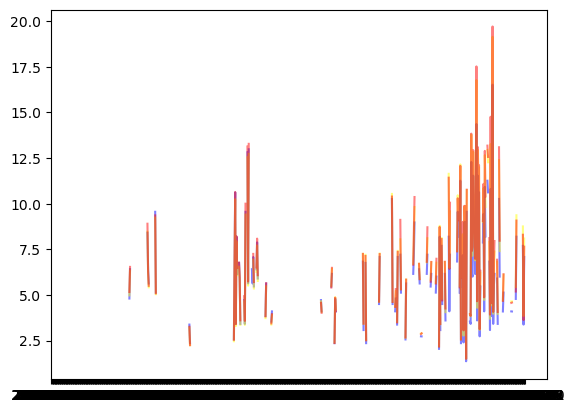

In [21]:
#Compare adjusted vs unadjusted
df_mov_evo_adjust = pd.read_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_dist_adjust.csv').drop('Unnamed: 0', axis=1) 
df_mov_evo_adjust_alternative = pd.read_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_dist_adjust_alternative.csv').drop('Unnamed: 0', axis=1) 
i = 200 #pick some i to try
plt.plot(df_mov_evo.loc[i, df_mov_evo.columns[2:]], color='blue', alpha=0.5)
# origin = df_mov_evo.loc[i, 'O']
# destination = df_mov_evo.loc[i, 'O']
plt.plot(df_mov_evo_adjust.loc[i, df_mov_evo_adjust.columns[2:]], color='red', alpha=0.5,zorder=8)
plt.plot(df_mov_evo_adjust_alternative.loc[i, df_mov_evo_adjust_alternative.columns[2:]], color='yellow', alpha=0.5,zorder=7)

plt.show()

In [ ]:
df_mov_evo_adjust

In [ ]:
df_mov_evo_adjust[pd.isna(df_mov_evo_adjust['2020-08-18'])]

In [ ]:
df_mov_evo[pd.isna(df_mov_evo['2020-08-18'])]

### Adjust FB movs evo baseline

In [ ]:
# baseline_pop_imput = gpd.read_file(wd + '/data/outputs/' + country_short + '/grids-with-data/movcell-baseline-imput-pop/movcell-baseline-imput-pop.gpkg')

# df_mov_evo_baseline_adjust = df_mov_evo_baseline.copy()

# for i in range(len(df_mov_evo_baseline_adjust)):
    
#     if i%1000 == 0:
#         print(i/len(df_mov_evo_baseline_adjust)*100)
        
#     origin = df_mov_evo_baseline_adjust.loc[i, 'O']
#     median = np.median([baseline_pop_imput.loc[origin, str(j)] for j in range(7)])
#     for column in df_mov_evo_baseline_adjust.columns[2:]:   
#         if pd.isna(df_mov_evo_baseline_adjust.loc[i, column]) == False:
#             wday = datetime.strptime(column, "%Y-%m-%d").weekday()
#             if (pd.isna(median) == False) and (pd.isna(baseline_pop_imput.loc[origin, str(wday)])==False):
#                 df_mov_evo_baseline_adjust.loc[i, column] = df_mov_evo_baseline_adjust.loc[i, column]*median/baseline_pop_imput.loc[origin, str(wday)]
#             else:
#                 df_mov_evo_baseline_adjust.loc[i, column] = np.nan

                              
# df_mov_evo_baseline_adjust.to_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo_baseline_adjust.csv')    




# Other types of adjustment

## Outflows

### Un-adjusted

In [ ]:
df_outflows_ua = pd.DataFrame({'O': np.unique(df_mov_evo['O'])})
df_outflows_ua_add = pd.DataFrame({column: [np.nan for i in range(len(df_outflows_ua))] for column in df_mov_evo.columns[2:]})

df_outflows_ua = pd.concat([df_outflows_ua, df_outflows_ua_add], axis=1)    
    

In [ ]:
for i in range(len(df_outflows_ua)):
    
    O = df_outflows_ua.loc[i,'O']
    df_origin = df_mov_evo[df_mov_evo['O']==O]
    
    for column in df_outflows_ua.columns[1:]:
        outflow = np.sum(df_origin[column])
        df_outflows_ua.loc[i, column] = outflow
        

In [ ]:
df_outflows_ua.to_csv(wd + '/data/outputs/' + country_short + '/mov-analysis/outflows_ua.csv')

In [ ]:
# Plotting outflows for one origin

row = 3
origin = df_mov_evo.loc[row,'O']

evo_movs = df_outflows_ua[df_outflows_ua['O'] == origin][df_outflows_ua.columns[1:]]
evo_movs = list(evo_movs.loc[evo_movs.index[0]])
plt.plot(np.arange(len(evo_movs)), evo_movs)

plt.show()

### Adjusted – using the median of total FB baseline population for all tiles computed across all baseline days

In [ ]:
df_outflows_ua  = pd.read_csv(wd + '/data/outputs/' + country_short + '/mov-analysis/outflows_ua.csv').drop('Unnamed: 0', axis=1)

df_outflows = df_outflows_ua.copy()

daily_sum = [np.sum(baseline_pop_imput[column]) for column in baseline_pop_imput.columns[:-1]]
median = np.median(daily_sum)

for column in df_outflows.columns[1:]:

    df_outflows[column] = df_outflows_ua[column]*median/np.sum(df_outflows_ua[column])

In [ ]:
df_outflows.to_csv(wd + '/data/outputs/' + country_short + '/mov-analysis/outflows_a.csv')

In [ ]:
# Plotting outflows for one origin

row = 3
origin = df_mov_evo.loc[row,'O']

evo_movs = df_outflows[df_outflows['O'] == origin][df_outflows.columns[1:]]
evo_movs = list(evo_movs.loc[evo_movs.index[0]])
plt.plot(np.arange(len(evo_movs)), evo_movs)

plt.show()

## Inflows

### Un-adjusted

In [ ]:
df_inflows_ua = pd.DataFrame({'D': np.unique(df_mov_evo['D'])})
df_inflows_ua_add = pd.DataFrame({column: [np.nan for i in range(len(df_inflows_ua))] for column in df_mov_evo.columns[2:]})

df_inflows_ua = pd.concat([df_inflows_ua, df_inflows_ua_add], axis=1)    


In [ ]:
for i in range(len(df_inflows_ua)):
    
    D = df_inflows_ua.loc[i,'D']
    df_destination = df_mov_evo[df_mov_evo['D']==D]
    
    for column in df_inflows_ua.columns[1:]:
        inflow = np.sum(df_destination[column])
        df_inflows_ua.loc[i, column] = inflow
        

In [ ]:
df_inflows_ua.to_csv(wd + '/data/outputs/' + country_short + '/mov-analysis/inflows_ua.csv')

In [ ]:
# Plotting outflows for one origin

row = 3
destination = df_mov_evo.loc[row,'D']

evo_movs = df_inflows_ua[df_inflows_ua['D'] == destination][df_inflows_ua.columns[1:]]
evo_movs = list(evo_movs.loc[evo_movs.index[0]])
plt.plot(np.arange(len(evo_movs)), evo_movs)

plt.show()

### Adjusted

In [ ]:
df_inflows_ua  = pd.read_csv(wd + '/data/outputs/' + country_short + '/mov-analysis/inflows_ua.csv').drop('Unnamed: 0', axis=1)

df_inflows = df_inflows_ua.copy()

daily_sum = [np.sum(baseline_pop_imput[column]) for column in baseline_pop_imput.columns[:-1]]
median = np.median(daily_sum)

for column in df_inflows.columns[1:]:

    df_inflows[column] = df_inflows_ua[column]*median/np.sum(df_inflows_ua[column])

In [ ]:
df_inflows.to_csv(wd + '/data/outputs/' + country_short + '/mov-analysis/inflows_a.csv')

In [ ]:
# Plotting outflows for one origin

row = 3
destination = df_mov_evo.loc[row,'D']

evo_movs = df_inflows[df_inflows['D'] == destination][df_inflows.columns[1:]]
evo_movs = list(evo_movs.loc[evo_movs.index[0]])
plt.plot(np.arange(len(evo_movs)), evo_movs)

plt.show()

## Netflows

### Un-adjusted

In [ ]:
ODs = np.unique(pd.concat([df_mov_evo['O'], df_mov_evo['D']]))

df_netflows_ua = pd.DataFrame({'ID': ODs})
df_netflows_ua_add = pd.DataFrame({column: [np.nan for i in range(len(df_netflows_ua))] for column in df_mov_evo.columns[2:]})

df_netflows_ua = pd.concat([df_netflows_ua, df_netflows_ua_add], axis=1) 

In [ ]:
for i in range(len(df_netflows_ua)):
    
    outflows = df_outflows_ua[df_outflows_ua['O']==df_netflows_ua.loc[i, 'ID']].reset_index(drop=True)
    if len(outflows) == 0:
        outflows.loc[0] = [df_netflows_ua.loc[i, 'ID']] + [0 for i in range(len(df_netflows_ua.columns[1:]))]
    inflows = df_inflows_ua[df_inflows_ua['D']==df_netflows_ua.loc[i, 'ID']].reset_index(drop=True)
    if len(inflows) == 0:
        inflows.loc[0] = [df_netflows_ua.loc[i, 'ID']] + [0 for i in range(len(df_netflows_ua.columns[1:]))]
    
    for column in outflows.columns[1:]:
        df_netflows_ua.loc[i, column] = inflows.loc[0, column] - outflows.loc[0, column]

In [ ]:
df_netflows_ua.to_csv(wd + '/data/outputs/' + country_short + '/mov-analysis/netflows_ua.csv')

### Adjusted

In [ ]:


df_netflows_ua  = pd.read_csv(wd + '/data/outputs/' + country_short + '/mov-analysis/netflows_ua.csv').drop('Unnamed: 0', axis=1)

df_netflows = df_netflows_ua.copy()

daily_sum = [np.sum(baseline_pop_imput[column]) for column in baseline_pop_imput.columns[:-1]]
median = np.median(daily_sum)

for column in df_netflows.columns[1:]:

    df_netflows[column] = df_netflows_ua[column]*median/np.sum(df_netflows_ua[column])

In [ ]:
df_netflows.to_csv(wd + '/data/outputs/' + country_short + '/mov-analysis/netflows_a.csv')